In [4]:
import pandas as pd
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import random
from numpy import unravel_index
# For nice Plots
%matplotlib inline
plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')
#from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
#import shap
df = pd.read_csv('data/BRFSS_clean.csv')

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
  df.iloc[:,3:], df['MENTHLTH'], test_size=0.20)

# Random Forest

## Initial Guess

In [15]:
random.seed(10)
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
#put our info in the random classifier
yhat_rf = rf.predict(X_test)
acc_rf = np.sum(yhat_rf==y_test)/len(y_test)
print("RF Accuracy: "+str(acc_rf))

RF Accuracy: 0.6216812461632903


In [16]:
mae = np.mean(np.abs(yhat_rf - y_test))
mae

3.891325199508901

## Cross Validation to Find Optimal Parameters

In [35]:
# Use cross validation to select a good value for k
acc_test = np.zeros((20, 100, 52))
acc_train = np.zeros((20, 100, 52))
acc_cv = np.zeros((20, 100, 52))
#make vectors to hold data
for k in range(1,21):
    #print(k)
    for i in range(1,53):
       # print(i)
        for j in range(1,101):
         # print(j)
          rf = RandomForestClassifier(max_depth=k, n_estimators=j, max_features=i, random_state=0)
          acc_cv[k-1, j-1, i-1] = cross_val_score(rf, X_train, y_train, cv=10).mean()
          # Train 
          #rf.fit(X_train, y_train)
          # Apply to Validation/Test Data
         # yhat_rf = rf.predict(X_test)
         # acc_test[k-1, j-1, i-1] = np.sum(yhat_rf == y_test)/len(y_test)
          # Apply to Validation/Test Data
         # yhat_rf = rf.predict(X_train)
         # acc_train[k-1, j-1, i-1] = np.sum(yhat_rf == y_train)/len(y_train)
#would expect accuracy on training data to be slightly better than on testing data

KeyboardInterrupt: 

In [37]:
unravel_index(acc_cv.argmax(), acc_cv.shape)
#1 max depth, 11 number of estimators, and 22 max features

(0, 0, 0)

In [10]:
rf= RandomForestClassifier(max_depth=1, n_estimators=11, max_features=22, random_state=0)
rf.fit(X_train, y_train)
#put our info in the random classifier
yhat_rf = rf.predict(X_test)
acc_rf = np.sum(yhat_rf==y_test)/len(y_test)
print("RF Accuracy: "+str(acc_rf))

RF Accuracy: 0.6122813075506446


In [11]:
mae = np.mean(np.abs(yhat_rf - y_test))
mae

4.107427869858809

We can see this model actually peforms worse than the default features used above. Therefore, we will use Bayesian optimization to try to find the optimal parameters. 

In [146]:
#testing different values to find area to hone in on
m_dep_array = [1,10,20,30,40,50,100,200]
n_est_array = [1,10,20,30,40,50,100,200]
m_feat_array=[1,10,20,30,40,50]

acc_test = np.zeros((len(m_dep_array), len(n_est_array), len(m_feat_array)))
acc_train = np.zeros((len(m_dep_array), len(n_est_array), len(m_feat_array)))
acc_cv_digits = np.zeros((len(m_dep_array), len(n_est_array), len(m_feat_array)))

for k in range(0,len(m_dep_array)):
    for i in range(0,len(m_feat_array)):
        for j in range(0, len(n_est_array)):
          rf = RandomForestClassifier(max_depth=m_dep_array[k], n_estimators=n_est_array[j], max_features=m_feat_array[i], random_state=0)
          acc_cv_digits[k, j, i] = cross_val_score(rf, X_train, y_train, cv=10).mean()
          # Train 
          rf.fit(X_train, y_train)
          # Apply to Validatio/Test Data
          yhat_rf = rf.predict(X_test)
          acc_test[k, j, i] = np.sum(yhat_rf == y_test)/len(y_test)
          # Apply to Validatio/Test Data
          yhat_rf = rf.predict(X_train)
          acc_train[k, j, i] = np.sum(yhat_rf == y_train)/len(y_train)

KeyboardInterrupt: 

In [147]:
from numpy import unravel_index
unravel_index = unravel_index(acc_cv_digits.argmax(), acc_cv_digits.shape)
print("Max occured at depth "+ str(m_dep_array[unravel_index[0]])+ ", n_estimators "+ str(n_est_array[unravel_index[1]])+ ", max features "+str(m_feat_array[unravel_index[2]]))
print("Max cross validated accuracy is " +str(acc_cv_digits[unravel_index]))

Max occured at depth 10, n_estimators 100, max features 30
Max cross validated accuracy is 0.6241169395690584


In [153]:
# Use cross validation to select a good value for k
m_dep_array = [9, 10, 11]
n_est_array = [99, 100, 101]
m_feat_array=[29, 30, 31]

acc_test = np.zeros((len(m_dep_array), len(n_est_array), len(m_feat_array)))
acc_train = np.zeros((len(m_dep_array), len(n_est_array), len(m_feat_array)))
acc_cv_digits = np.zeros((len(m_dep_array), len(n_est_array), len(m_feat_array)))
#make vectors to hold data
for k in range(0,len(m_dep_array)):
    for i in range(0,len(m_feat_array)):
        for j in range(0, len(n_est_array)):
          rf = RandomForestClassifier(max_depth=m_dep_array[k], n_estimators=n_est_array[j], max_features=m_feat_array[i], random_state=0)
          acc_cv_digits[k, j, i] = cross_val_score(rf, X_train, y_train, cv=10).mean()
          # Train 
          rf.fit(X_train, y_train)
          # Apply to Validatio/Test Data
          yhat_rf = rf.predict(X_test)
          acc_test[k, j, i] = np.sum(yhat_rf == y_test)/len(y_test)
          # Apply to Validatio/Test Data
          yhat_rf = rf.predict(X_train)
          acc_train[k, j, i] = np.sum(yhat_rf == y_train)/len(y_train)
          print(acc_cv_digits[k, j, i])

0.6239490835224967
0.6239203081542248
0.623920307924204
0.6238243874230623
0.6238004077578185
0.6238099993938954
0.6238483666282647
0.6238531625613135


KeyboardInterrupt: 

In [154]:
from numpy import unravel_index
unravel_index = unravel_index(acc_cv_digits.argmax(), acc_cv_digits.shape)
print("Max occured at depth "+ str(m_dep_array[unravel_index[0]])+ ", n_estimators "+ str(n_est_array[unravel_index[1]])+ ", max features "+str(m_feat_array[unravel_index[2]]))
print("Max cross validated accuracy is " +str(acc_cv_digits[unravel_index]))

Max occured at depth 9, n_estimators 99, max features 29
Max cross validated accuracy is 0.6239490835224967


In [239]:
rf= RandomForestClassifier(max_depth=9, n_estimators=99, max_features=29, random_state=0)
rf.fit(X_train, y_train)
#put our info in the random classifier
predictions = rf.predict(X_test)
for prediction in predictions:
    if prediction<0:
        prediction==0
    if prediction>30:
        prediction==30
acc_rf = np.sum(predictions==y_test)/len(y_test)
print("RF Accuracy: "+str(acc_rf))

RF Accuracy: 0.6264387661141805


In [240]:
rounded = y_test.astype(int)
correct = (predictions==rounded+1) | (predictions==rounded) | (predictions==rounded-1)
acc_one_day = np.mean(correct)
print("RF Accuracy Plus or Minus 1 Day: " + str(acc_one_day))

RF Accuracy Plus or Minus 1 Day: 0.6583026396562308


In [241]:
mae = np.mean(np.abs(predictions - y_test))
mae

3.8302831491712706

Text(0, 0.5, 'Actual Bad Mental Health Days')

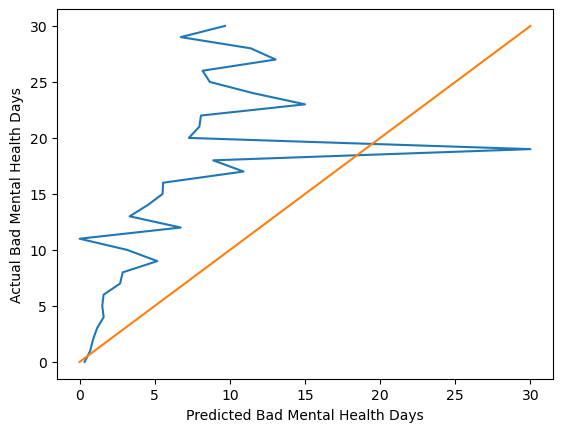

In [242]:
df_calibration = pd.DataFrame(predictions, columns=['predictions'])
df_calibration['actual'] = y_test.values 
df_calibration = df_calibration.groupby('actual').mean()
df_calibration = df_calibration.reset_index()
plt.plot(df_calibration['predictions'], df_calibration['actual'])
#plt.plot(df_calibration['predictions'], df_calibration['actual'])
plt.plot(list(range(31)), list(range(31)))
plt.xlabel("Predicted Bad Mental Health Days")
plt.ylabel("Actual Bad Mental Health Days")

In [243]:
accuracies = []
for i in range(31):
    df_calibration_temp = df_calibration[df_calibration['actual'] == i]
    accuracies.append(np.mean(df_calibration_temp['predictions'].astype('int') == df_calibration_temp['actual']))

Text(0, 0.5, 'Accuracy')

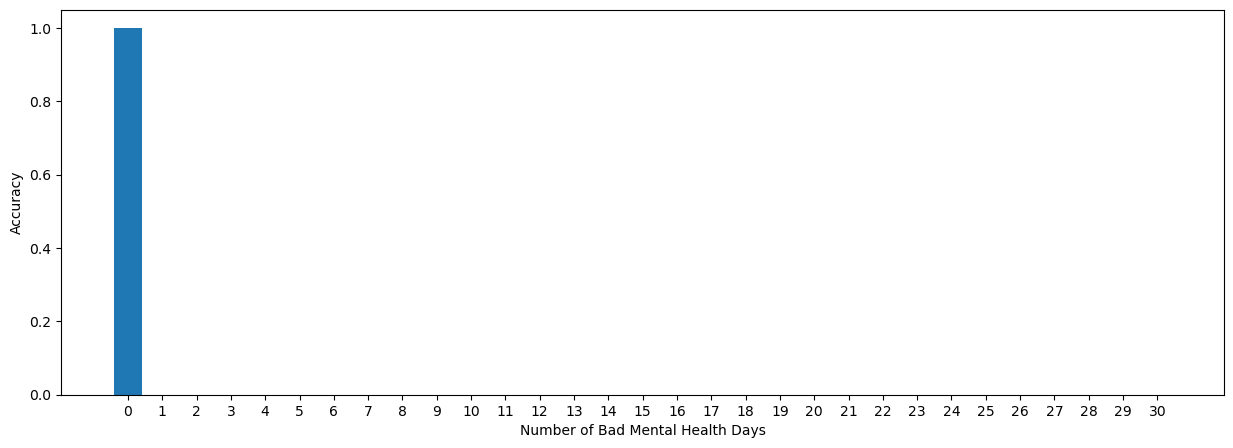

In [244]:
plt.figure(figsize =(15,5))
bars = plt.bar([str(i) for i in range(31)], accuracies)
plt.xlabel("Number of Bad Mental Health Days")
plt.ylabel("Accuracy")

# Neural Network

In [18]:
import tensorflow as tf
from tensorflow import keras

### Simple Neural Network

In [246]:
input_shape = [X_train.shape[1]]
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                3392      
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


In [247]:

# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam', 
               
              # MAE error is good for
              # numerical predictions
              loss='mae') 

In [248]:
losses = model.fit(X_train, y_train,
 
                   #validation_data=(X_test, y_test),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=40,  # total epoch
 
                   )

Epoch 1/150
815/815 [==============================] - 1s 1ms/step - loss: 6.0621
Epoch 2/150
815/815 [==============================] - 1s 1ms/step - loss: 4.6916
Epoch 3/150
815/815 [==============================] - 1s 1ms/step - loss: 4.4454
Epoch 4/150
815/815 [==============================] - 1s 1ms/step - loss: 4.2066
Epoch 5/150
815/815 [==============================] - 1s 1ms/step - loss: 4.1411
Epoch 6/150
815/815 [==============================] - 1s 1ms/step - loss: 3.9816
Epoch 7/150
815/815 [==============================] - 1s 1ms/step - loss: 3.8892
Epoch 8/150
815/815 [==============================] - 1s 1ms/step - loss: 3.7953
Epoch 9/150
815/815 [==============================] - 1s 1ms/step - loss: 3.7408
Epoch 10/150
815/815 [==============================] - 1s 1ms/step - loss: 3.6756
Epoch 11/150
815/815 [==============================] - 1s 1ms/step - loss: 3.6936
Epoch 12/150
815/815 [==============================] - 1s 1ms/step - loss: 3.6483
Epoch 13/150


In [249]:
predictions_neural = model.predict(X_test)
for prediction in predictions_neural:
    if prediction<0:
        prediction==0
    if prediction>30:
        prediction==30
unrounded = predictions_neural.flatten()
predictions_neural = predictions_neural.flatten().astype(int)

1629/1629 [==============================] - 1s 428us/step


In [250]:
acc_nn = np.sum(predictions_neural==y_test)/len(y_test)
print("NN Accuracy: "+str(acc_nn))

NN Accuracy: 0.549627839165132


In [251]:
mae = np.mean(np.abs(predictions_neural - y_test))
mae

3.4796654389195827

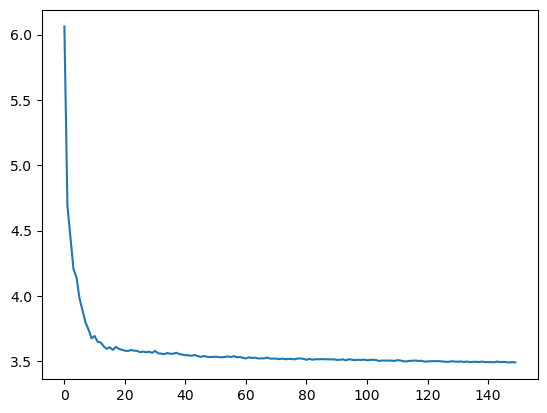

In [252]:
loss = losses.history['loss']
plt.plot(loss)

Text(0, 0.5, 'Actual Bad Mental Health Days')

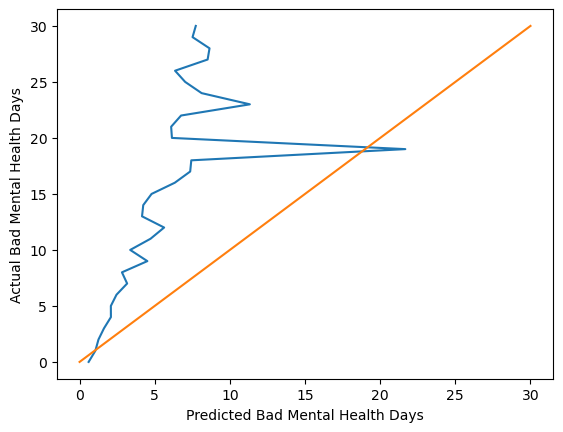

In [253]:
df_calibration = pd.DataFrame(unrounded, columns=['predictions'])
df_calibration['actual'] = y_test.values 
df_calibration = df_calibration.groupby('actual').mean()
df_calibration = df_calibration.reset_index()
plt.plot(df_calibration['predictions'], df_calibration['actual'])
#plt.plot(df_calibration['predictions'], df_calibration['actual'])
plt.plot(list(range(31)), list(range(31)))
plt.xlabel("Predicted Bad Mental Health Days")
plt.ylabel("Actual Bad Mental Health Days")

In [171]:
accuracies = []
for i in range(31):
    df_calibration_temp = df_calibration[df_calibration['actual'] == i]
    accuracies.append(np.mean(df_calibration_temp['predictions'].astype('int') == df_calibration_temp['actual']))

Text(0, 0.5, 'Accuracy')

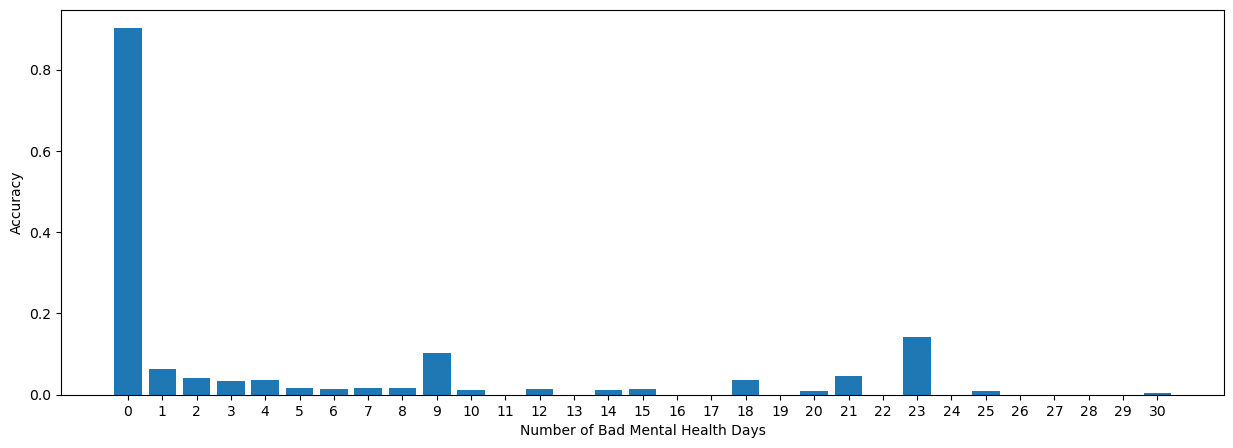

In [172]:
plt.figure(figsize =(15,5))
bars = plt.bar([str(i) for i in range(31)], accuracies)
plt.xlabel("Number of Bad Mental Health Days")
plt.ylabel("Accuracy")

### More Complex Neural Network

In [87]:
input_shape = [X_train.shape[1]]
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=200, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               10600     
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________


In [88]:

# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam', 
               
              # MAE error is good for
              # numerical predictions
              loss='mae') 

In [89]:
losses = model.fit(X_train, y_train,
 
                   #validation_data=(X_test, y_test),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=40,  # total epoch
 
                   )

Epoch 1/150
815/815 [==============================] - 2s 2ms/step - loss: 7.8233
Epoch 2/150
815/815 [==============================] - 2s 2ms/step - loss: 4.3439
Epoch 3/150
815/815 [==============================] - 2s 2ms/step - loss: 4.0877
Epoch 4/150
815/815 [==============================] - 2s 2ms/step - loss: 3.9094
Epoch 5/150
815/815 [==============================] - 2s 2ms/step - loss: 3.9896
Epoch 6/150
815/815 [==============================] - 2s 2ms/step - loss: 4.0735
Epoch 7/150
815/815 [==============================] - 2s 2ms/step - loss: 4.0613
Epoch 8/150
815/815 [==============================] - 2s 2ms/step - loss: 4.0394
Epoch 9/150
815/815 [==============================] - 2s 2ms/step - loss: 4.0107
Epoch 10/150
815/815 [==============================] - 2s 2ms/step - loss: 3.9211
Epoch 11/150
815/815 [==============================] - 2s 2ms/step - loss: 3.9540
Epoch 12/150
815/815 [==============================] - 2s 2ms/step - loss: 3.8537
Epoch 13/150


In [233]:
predictions = model.predict(X_test)
unrounded = predictions.flatten()
predictions = predictions.flatten().astype(int)

1629/1629 [==============================] - 1s 436us/step


In [237]:
predictions.shape

(1615968,)

In [236]:
acc_nn = np.sum(predictions==y_test)/len(y_test)
print("NN Accuracy: "+str(acc_nn))

ValueError: ('Lengths must match to compare', (52128,), (1615968,))

In [228]:
rounded = y_test.astype(int)

In [229]:
correct = (predictions_neural==rounded+1) | (predictions_neural==rounded) | (predictions_neural==rounded-1)

In [230]:
acc_one_day = np.mean(correct)
print("NN Accuracy Plus or Minus 1 Day: " + str(acc_one_day))

NN Accuracy Plus or Minus 1 Day: 0.6287983425414365


In [231]:
mae = np.mean(np.abs(predictions - y_test))
mae

ValueError: operands could not be broadcast together with shapes (1615968,) (52128,) 

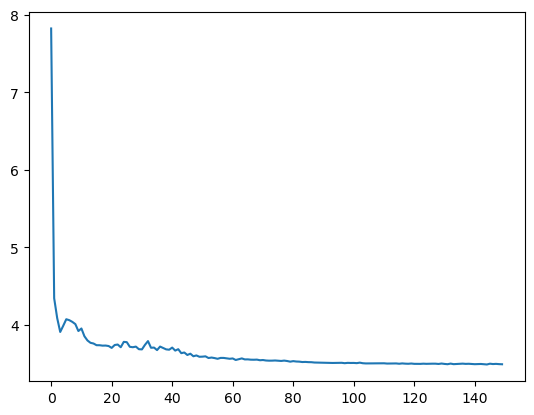

In [98]:
loss = losses.history['loss']
plt.plot(loss)

In [227]:
df_calibration = pd.DataFrame(unrounded, columns=['predictions'])
df_calibration['actual'] = y_test.values 
df_calibration = df_calibration.groupby('actual').mean()
df_calibration = df_calibration.reset_index()
plt.plot(df_calibration['predictions'], df_calibration['actual'])
#plt.plot(df_calibration['predictions'], df_calibration['actual'])
plt.plot(list(range(31)), list(range(31)))
plt.xlabel("Predicted Bad Mental Health Days")
plt.ylabel("Actual Bad Mental Health Days")

ValueError: Length of values (52128) does not match length of index (1615968)

In [128]:
accuracies = []
for i in range(31):
    df_calibration_temp = df_calibration[df_calibration['actual'] == i]
    accuracies.append(np.mean(df_calibration_temp['predictions'].astype('int') == df_calibration_temp['actual']))

In [129]:
accuracies

[0.9012441679626749,
 0.04792899408284024,
 0.051685393258426963,
 0.043410041841004186,
 0.011752136752136752,
 0.03772819472616633,
 0.013888888888888888,
 0.01698754246885617,
 0.010638297872340425,
 0.0,
 0.017467248908296942,
 0.0,
 0.007352941176470588,
 0.0,
 0.020710059171597635,
 0.012805587892898719,
 0.0,
 0.0,
 0.0,
 0.0,
 0.016243654822335026,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02040816326530612,
 0.0007476635514018691]

Text(0, 0.5, 'Accuracy')

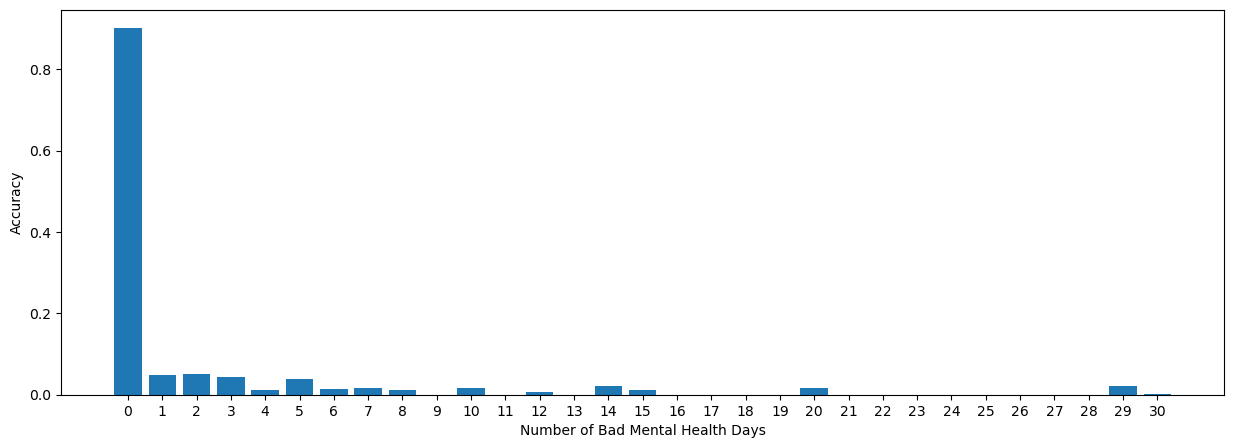

In [135]:
plt.figure(figsize =(15,5))
bars = plt.bar([str(i) for i in range(31)], accuracies)
plt.xlabel("Number of Bad Mental Health Days")
plt.ylabel("Accuracy")

In [53]:
df

,Unnamed: 0,SEQNO,MENTHLTH,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,DIAB,...,RETIR,UNAB_WORK,M,F,WHITE,BLACK,ASIAN,AM_IND,HISP,ANOTHER_RACE
0,0,b'2021000001',10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,1,0,0,0,0,0
1,2,b'2021000003',0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,1,0,0,0,0
2,3,b'2021000004',10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,1,1,0,0,0,0,0
3,5,b'2021000006',0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,0
4,9,b'2021000010',5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260632,438686,b'2021001379',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
260633,438687,b'2021001380',0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,0,0,0,1,0
260634,438688,b'2021001381',20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
260635,438691,b'2021001384',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,0,0,0


In [54]:
pd.set_option('display.max_columns', None)

In [55]:
df

,Unnamed: 0,SEQNO,MENTHLTH,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,DIAB,HEALTHSCORE,PHYSHLTH,HIGHBP,HEARTATTACK,HEARTDISEASE,STROKE,ASTHMA,SKINCANCER,OTHERCANCER,LUNGISSUE,KIDNEYISSUE,ATHRITIS,PARTNERED,COLLEGE,OWNHOME,VET,EMPLOYED,CHILDREN,INCOMECAT,BMI,AGEG5YR,SMOKE,ECIG,DRINKPERW,POTADAY,FRUIT_J_DAY,FRUITDAY,GRNVEGDAY,OTHERVEGDAY,AFFORDOC,INSURED,EXERCISE,DISCORE,UNEMP,EMPL,RETIR,UNAB_WORK,M,F,WHITE,BLACK,ASIAN,AM_IND,HISP,ANOTHER_RACE
0,0,b'2021000001',10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,20.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,5.0,1454.0,11.0,0.0,0.0,5.397605e-79,1.400000e+01,5.397605e-79,100.0,5.700000e+01,100.0,0.0,1.0,0.0,1.0,0,0,1,0,0,1,1,0,0,0,0,0
1,2,b'2021000003',0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,2829.0,11.0,0.0,0.0,5.397605e-79,1.400000e+01,5.397605e-79,100.0,5.397605e-79,43.0,0.0,1.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0,0,0
2,3,b'2021000004',10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0,3347.0,9.0,0.0,0.0,3.000000e+02,2.700000e+01,7.100000e+01,43.0,1.000000e+01,71.0,0.0,1.0,1.0,0.0,0,0,1,0,0,1,1,0,0,0,0,0
3,5,b'2021000006',0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,6.0,2437.0,13.0,0.0,0.0,5.397605e-79,1.400000e+01,5.397605e-79,29.0,1.400000e+01,14.0,0.0,1.0,0.0,1.0,0,0,1,0,1,0,1,0,0,0,0,0
4,9,b'2021000010',5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,8.0,3994.0,10.0,0.0,0.0,1.400000e+02,4.300000e+01,5.397605e-79,100.0,2.900000e+01,57.0,0.0,1.0,1.0,1.0,0,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260632,438686,b'2021001379',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,2905.0,2.0,0.0,0.0,1.870000e+02,5.397605e-79,1.000000e+02,100.0,2.900000e+01,43.0,0.0,1.0,1.0,0.0,0,1,0,0,1,0,0,1,0,0,0,0
260633,438687,b'2021001380',0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,2148.0,10.0,0.0,0.0,1.200000e+03,1.400000e+01,2.000000e+02,50.0,2.000000e+02,71.0,0.0,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,1,0
260634,438688,b'2021001381',20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,2469.0,3.0,0.0,0.0,1.870000e+02,5.000000e+01,1.400000e+01,143.0,2.900000e+01,300.0,1.0,0.0,1.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0
260635,438691,b'2021001384',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,6.0,2373.0,10.0,0.0,0.0,1.400000e+02,1.300000e+01,5.397605e-79,100.0,4.300000e+01,100.0,0.0,1.0,1.0,0.0,0,0,1,0,1,0,0,1,0,0,0,0


# Classification with Neural Network

In [254]:
def onehot(y, k):
    probs = np.zeros((len(y),k))
    for i, p in enumerate(y):
        probs[i][p] = 1
    return probs
n_labels = 31
Y_train_bin = onehot(y_train.astype(int), n_labels)


In [255]:
input_shape = [X_train.shape[1]]
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=31, activation='softmax')
])
model.summary()

model.compile(optimizer='adam', 
               
              # MAE error is good for
              # numerical predictions
              loss=tf.losses.CategoricalCrossentropy(from_logits=True), 
             metrics =['accuracy']) 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                3392      
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 31)                2015      
                                                                 
Total params: 13,727
Trainable params: 13,727
Non-trainable params: 0
_________________________________________________________________


In [256]:
losses = model.fit(X_train, Y_train_bin,
 
                   #validation_data=(X_test, y_test),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=30,  # total epoch
 
                   )

Epoch 1/30
815/815 [==============================] - 1s 1ms/step - loss: 6.0548 - accuracy: 0.5701
Epoch 2/30
815/815 [==============================] - 1s 1ms/step - loss: 1.6830 - accuracy: 0.6088
Epoch 3/30
815/815 [==============================] - 1s 1ms/step - loss: 1.5970 - accuracy: 0.6170
Epoch 4/30
815/815 [==============================] - 1s 1ms/step - loss: 1.5708 - accuracy: 0.6188
Epoch 5/30
815/815 [==============================] - 1s 1ms/step - loss: 1.5574 - accuracy: 0.6198
Epoch 6/30
815/815 [==============================] - 1s 1ms/step - loss: 1.5511 - accuracy: 0.6201
Epoch 7/30
815/815 [==============================] - 1s 1ms/step - loss: 1.5417 - accuracy: 0.6211
Epoch 8/30
815/815 [==============================] - 1s 1ms/step - loss: 1.5412 - accuracy: 0.6211
Epoch 9/30
815/815 [==============================] - 1s 1ms/step - loss: 1.5370 - accuracy: 0.6214
Epoch 10/30
815/815 [==============================] - 1s 1ms/step - loss: 1.5314 - accuracy: 0.6216

In [257]:
predictions_classifier = model.predict(X_test)
unrounded = predictions_classifier.flatten()
predictions = predictions_classifier.flatten().astype(int)

1629/1629 [==============================] - 1s 436us/step


In [258]:
predictions_classifier= np.argmax(predictions_classifier, axis=1)

In [259]:
acc_nn = np.sum(predictions_classifier==y_test)/len(y_test)
print("NN Accuracy: "+str(acc_nn))

NN Accuracy: 0.6258248925721301


In [260]:
rounded = y_test.astype(int)

In [261]:
correct = (predictions_classifier==rounded+1) | (predictions_classifier==rounded) | (predictions_classifier==rounded-1)

In [262]:
acc_one_day = np.mean(correct)
print("NN Accuracy Plus or Minus 1 Day: " + str(acc_one_day))

NN Accuracy Plus or Minus 1 Day: 0.6577463167587477


Text(0, 0.5, 'Actual Bad Mental Health Days')

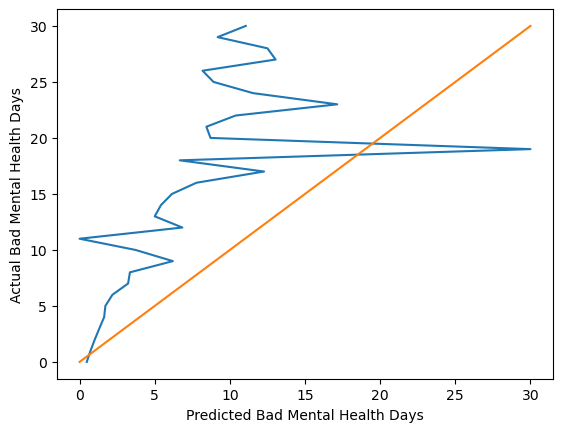

In [263]:
df_calibration = pd.DataFrame(predictions_classifier, columns=['predictions'])
df_calibration['actual'] = y_test.values 
df_calibration = df_calibration.groupby('actual').mean()
df_calibration = df_calibration.reset_index()
plt.plot(df_calibration['predictions'], df_calibration['actual'])
#plt.plot(df_calibration['predictions'], df_calibration['actual'])
plt.plot(list(range(31)), list(range(31)))
plt.xlabel("Predicted Bad Mental Health Days")
plt.ylabel("Actual Bad Mental Health Days")

In [217]:
df_calibration.groupby('actual').mean()

,predictions
actual,
0.0,0.296267
1.0,0.532544
2.0,0.701445
3.0,1.035565
4.0,1.420940
5.0,1.377282
6.0,1.406250
7.0,2.576444
8.0,2.686170


In [202]:
accuracies = []
for i in range(31):
    df_calibration_temp = df_calibration[df_calibration['actual'] == i]
    accuracies.append(np.mean(df_calibration_temp['predictions'].astype('int') == df_calibration_temp['actual']))

Text(0, 0.5, 'Accuracy')

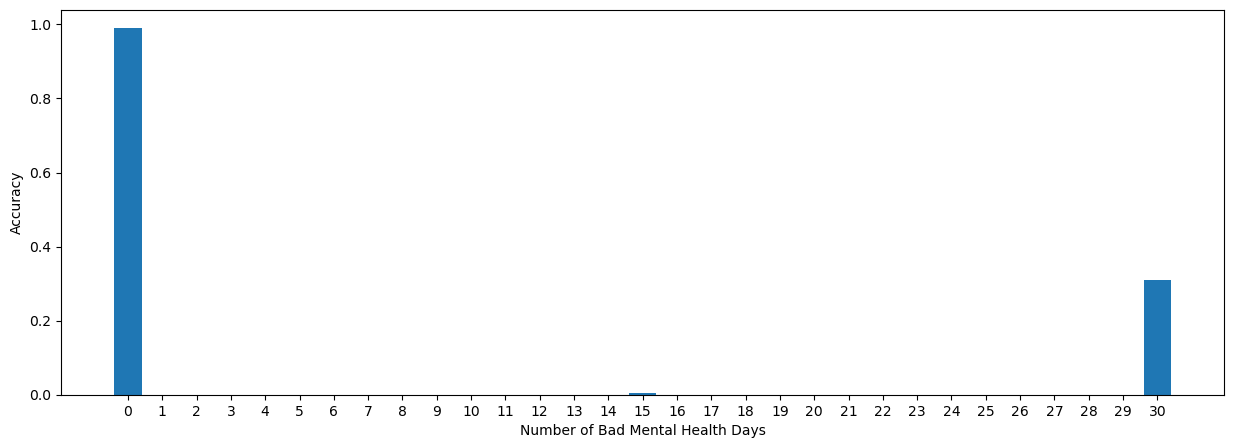

In [203]:
plt.figure(figsize =(15,5))
bars = plt.bar([str(i) for i in range(31)], accuracies)
plt.xlabel("Number of Bad Mental Health Days")
plt.ylabel("Accuracy")

In [204]:
mae = np.mean(np.abs(predictions_classifier - y_test))
mae

3.7922997237569063

In [232]:
y_test


177812    20.0
248221    30.0
161851     0.0
18359      0.0
82819      0.0
          ... 
142050     0.0
259231     0.0
41418      0.0
255702     1.0
40339      2.0
Name: MENTHLTH, Length: 52128, dtype: float64